In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# importing dataset
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
x = df.iloc[:,0:2]
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [8]:
y= df.iloc[:,2]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [9]:
# splitting the dataset
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 2)
(100, 2)
(300,)
(100,)


In [20]:
# scaling the x_train and x_test
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# after scaling it return numpy so we need to make it df again

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),columns = ['Age','EstimatedSalary'])
x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns = ['Age','EstimatedSalary'])

print(scaler.mean_)
print(scaler.scale_)
# it represents the average and std values of the original features before scaling.

[3.75333333e+01 7.07433333e+04]
[1.07282597e+01 3.40698907e+04]


## Geometrical comparison of StandardScaler

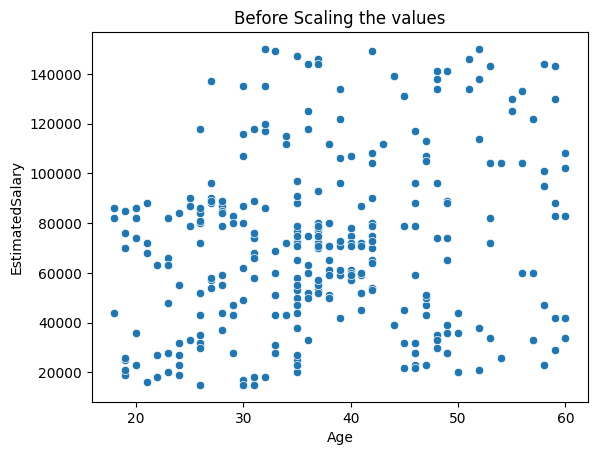

In [21]:
import matplotlib.pyplot as plt
sns.scatterplot(x=x_train.Age, y=x_train.EstimatedSalary)
plt.title("Before Scaling the values")
plt.show()

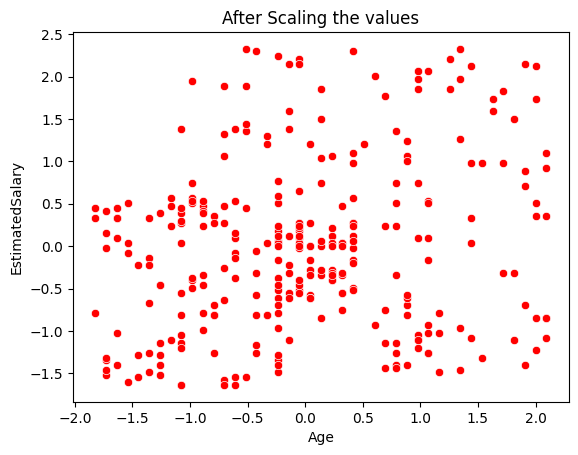

In [23]:
# after scaling 
sns.scatterplot(x=x_train_scaled.Age, y=x_train_scaled.EstimatedSalary, color= 'r')
plt.title("After Scaling the values")
plt.show()

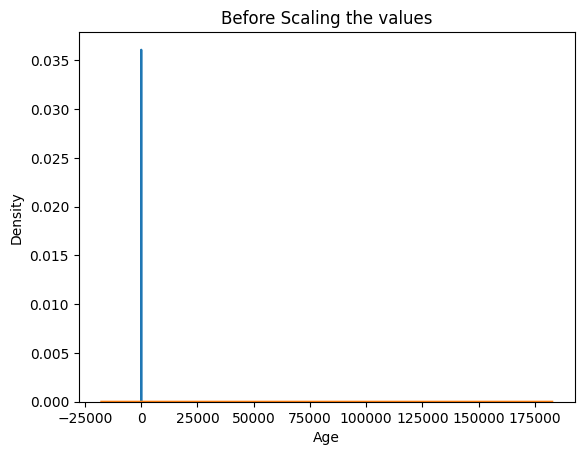

In [33]:
sns.kdeplot(x_train['Age'])
sns.kdeplot(x_train['EstimatedSalary'])
plt.title("Before Scaling the values")
plt.show()

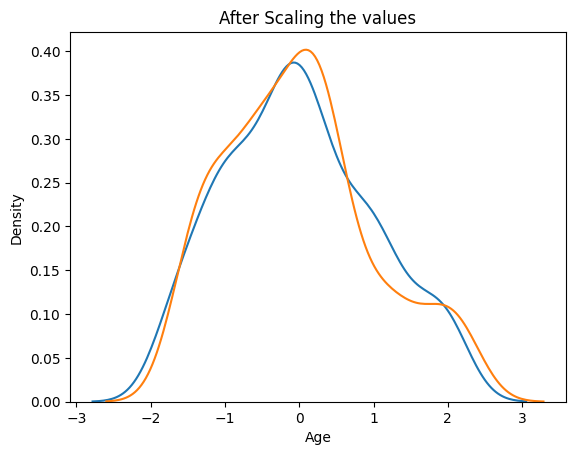

In [34]:
sns.kdeplot(x_train_scaled['Age'])
sns.kdeplot(x_train_scaled['EstimatedSalary'])
plt.title("After Scaling the values")
plt.show()

## Compare How it effect some models like Gradient descent

In [39]:
from sklearn.linear_model import SGDRegressor as lg

In [40]:
algo1 = lg()
algo2 = lg()

algo1.fit(x_train,y_train)
algo2.fit(x_train_scaled,y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [41]:
# now do prediction

y_pred= algo1.predict(x_test)
y_pred_scaled= algo2.predict(x_test_scaled)

In [45]:
# now compare the accuracy score in both cases

from sklearn.metrics import accuracy_score

print('without Scaling : ',algo1.score(x_test,y_test))
print('with Scaling : ',algo2.score(x_test_scaled,y_test))

without Scaling :  -3.311029808572313e+36
with Scaling :  0.45565117206387873


## Compare results for Descision tree classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier as ds

algo1 = ds()
algo2 = ds()

algo1.fit(x_train,y_train)
algo2.fit(x_train_scaled,y_train)

y_pred = algo1.predict(x_test)
y_pred_scaled = algo2.predict(x_test_scaled)

print('without scaling ',accuracy_score(y_test,y_pred))
print('with scaling ',accuracy_score(y_test,y_pred_scaled))

without scaling  0.88
with scaling  0.89
